# Project 1: Babynames

## I. Characterise One File

### 1. Read the data

    - Read the file yob2000.txt
    - Name the columns
    - Print the first 10 entries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
popular_names = pd.read_csv('yob2000.csv', 
                            names = ['Names', 'Sex', 'Birth Count'])

In [3]:
len(popular_names)

29769

In [4]:
popular_names.head(10)

,Names,Sex,Birth Count
0,Emily,F,25953
1,Hannah,F,23080
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17697
5,Alexis,F,17629
6,Samantha,F,17266
7,Jessica,F,15709
8,Elizabeth,F,15094
9,Taylor,F,15078


In [5]:
top_1000 = popular_names.sort_values(by = 'Birth Count',
                                     ascending=False).reset_index().drop('index', axis=1)

In [6]:
top_1000.head(10)

,Names,Sex,Birth Count
0,Jacob,M,34471
1,Michael,M,32035
2,Matthew,M,28572
3,Joshua,M,27538
4,Emily,F,25953
5,Christopher,M,24931
6,Nicholas,M,24652
7,Andrew,M,23639
8,Hannah,F,23080
9,Joseph,M,22825


### 2. Calculate total births
    - Calculate the sum of the birth count column in the file yob2000.txt.\

In [7]:
top_1000['Birth Count'].sum()

3778079

### 3. Separate boys / girls
    - Calculate separate sums for boys and girls.
    - Plot both sums in a bar plot

In [8]:
top_1000.groupby('Sex')['Birth Count'].sum()

Sex
F    1815110
M    1962969
Name: Birth Count, dtype: int64

In [9]:
plot_boys_girls = top_1000.groupby('Sex')['Birth Count'].sum()

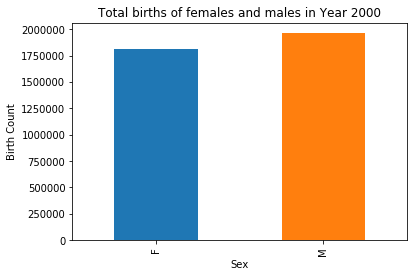

In [10]:
plot_boys_girls.plot.bar()
plt.ylabel('Birth Count')
plt.title('Total births of females and males in Year 2000')
plt.show()

But there's a greater amount of female names!

In [11]:
top_1000['Sex'].value_counts() # counts column values

F    17653
M    12116
Name: Sex, dtype: int64

### 4. Frequent names
    - Count how many names occur at least 1000 times in the file yob2000.txt.

In [12]:
top_1000[top_1000['Birth Count'] > 1000].head(10)

,Names,Sex,Birth Count
0,Jacob,M,34471
1,Michael,M,32035
2,Matthew,M,28572
3,Joshua,M,27538
4,Emily,F,25953
5,Christopher,M,24931
6,Nicholas,M,24652
7,Andrew,M,23639
8,Hannah,F,23080
9,Joseph,M,22825


In [13]:
top_1000[top_1000['Birth Count'] > 1000]['Birth Count'].count()

617

### 5. Relative amount
    - Create a new column containing the percentage of a name on the total births of that year.
    - Verify that the sum of percentages is 100%.

In [14]:
(top_1000['Birth Count']/(top_1000['Birth Count'].sum()) * 100).head()

0    0.912395
1    0.847918
2    0.756257
3    0.728889
4    0.686936
Name: Birth Count, dtype: float64

In [15]:
top_1000['Percentage of total count'] = top_1000['Birth Count']/(top_1000['Birth Count'].sum()) * 100

In [16]:
top_1000.head()

,Names,Sex,Birth Count,Percentage of total count
0,Jacob,M,34471,0.912395
1,Michael,M,32035,0.847918
2,Matthew,M,28572,0.756257
3,Joshua,M,27538,0.728889
4,Emily,F,25953,0.686936


In [17]:
top_1000['Percentage of total count'].sum().round()

100.0

### 6. Search your name
    - Identify and print all lines containing your name in the year 2000.

In [18]:
top_1000[top_1000['Names'].str.contains('Max')]

,Names,Sex,Birth Count,Percentage of total count
211,Maxwell,M,3364,0.089040
306,Max,M,2355,0.062333
1008,Maximilian,M,491,0.012996
1619,Maximillian,M,242,0.006405
1943,Maximus,M,188,0.004976
2027,Maxine,F,178,0.004711
2172,Maximiliano,M,161,0.004261
2202,Maxim,M,158,0.004182
3459,Maxx,M,84,0.002223
3662,Maximo,M,77,0.002038


### 7. Bar plot
    - Create a bar plot showing 5 selected names for the year 2000.

In [19]:
peppermint = top_1000.set_index('Names').loc[['Max', 'Eric','Josh','Daniela','Michael']]

In [20]:
peppermint

,Sex,Birth Count,Percentage of total count
Names,,,
Max,M,2355,0.062333
Max,F,8,0.000212
Eric,M,9156,0.242345
Eric,F,26,0.000688
Josh,M,195,0.005161
Daniela,F,2151,0.056934
Daniela,M,7,0.000185
Michael,M,32035,0.847918
Michael,F,114,0.003017


In [21]:
peppermint_5 = peppermint.groupby('Names')[['Birth Count']].sum()
peppermint_5

,Birth Count
Names,
Daniela,2158
Eric,9182
Josh,195
Max,2363
Michael,32149


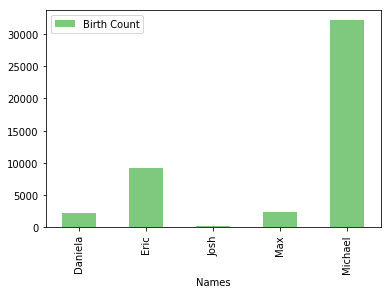

In [22]:
peppermint_5.plot.bar(stacked=True, colormap='Accent')

## II. Characterize all files

### 1. Read all names
To read the complete dataset, you need to loop though all file names:

    yob1880.txt
    yob1881.txt
    yob1882.txt
    ...

Complete the code below by inserting _csv, data````df, names=['name', 'gender', 'count'], y and 2017:

    years = range(1880, ____, 10)
    data = []
    for y in years:
        fn = f'yob{_____}.txt'
        df = pd.read____(fn, ____)
        df['year'] = y
        data.append(____)
    df = pd.concat(____)
    
Run the code and check the size of the resulting data frame.

Hint: In addition to some pandas functions, you may need to look up Python format strings.

In [23]:
years = range(1880, 2017)
data = []
for y in years:
    fn = f'yob{y}.txt'
    df = pd.read_csv(fn, names =['Names', 'Sex', 'Birth Count'])
    df['year'] = y
    data.append(df)
usa_names = pd.concat(data)

In [24]:
usa_names.head(10)

,Names,Sex,Birth Count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [25]:
len(usa_names)

1892196

### 2. Plot a time series

- extract all rows containing your name from the variable df
- plot the number of babies having your name and gender over time
- make the plot nicer by adding row/column labels and a title
- change the color and thickness of the line
- save the plot as a high-resolution diagram

In [26]:
my_name = usa_names[(usa_names['Names']=='Max') 
                    & (usa_names['Sex'] == 'M')]
my_name.head(10)

,Names,Sex,Birth Count,year
1171,Max,M,52,1880
1114,Max,M,66,1881
1209,Max,M,74,1882
1216,Max,M,75,1883
1348,Max,M,80,1884
1381,Max,M,71,1885
1465,Max,M,73,1886
1479,Max,M,73,1887
1605,Max,M,118,1888
1641,Max,M,83,1889


In [27]:
my_name = my_name.set_index(['Names', 'Sex', 'year']).stack()
my_name = my_name.unstack((0,1,3))
my_name.head(10)

Names,Max
Sex,M
,Birth Count
year,
1880,52
1881,66
1882,74
1883,75
1884,80
1885,71
1886,73


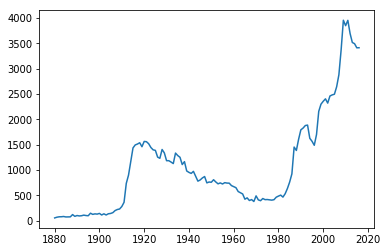

In [28]:
plt.plot(my_name)

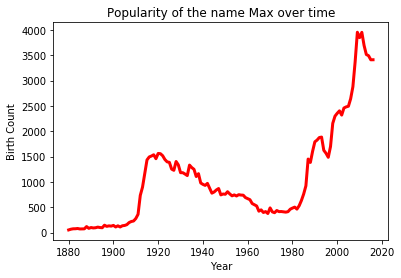

In [29]:
plt.plot(my_name, linewidth=3, color= 'red')
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.title('Popularity of the name Max over time')
plt.savefig('Max_over_time.png', dpi = 300)
plt.show()

### 3. Name diversity
- Have the baby names become more diverse over time?
- What assumptions is your calculation based upon?

In [30]:
usa_names.head(5)

,Names,Sex,Birth Count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [31]:
name_diversity = usa_names.groupby('year')[['Names']].count()

In [32]:
name_diversity.head()

,Names
year,
1880,2000
1881,1935
1882,2127
1883,2084
1884,2297


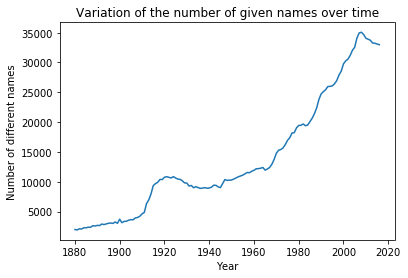

In [33]:
plt.plot(name_diversity)
plt.xlabel('Year')
plt.ylabel('Number of different names')
plt.title('Variation of the number of given names over time')
plt.show()

The SSA files that we are extracting our data from are for the 'Top 1000' names, therefore, there are a certain number of unique names (names with a yearly frequency of less than 5)  that will not be included in the data. 

Our calculation essentially assumes that the number of names that has a frequency of less than 5 in the 1880s up until 2017 has probably increased too, or are at least equal! i.e. The number of names not present in the Top 1000 list does not affect the data enough that we can't conclude that in the present day there is a greater amount of name diversity.

### 4. Long names
- add an extra column that contains the length of the name
- print the 10 longest names to the screen.

Hint: If having the name in the index was useful so far, it is not so much useful for this task. With df.reset_index(inplace=True) you can move the index to a regular column.

In [34]:
usa_names.head()

,Names,Sex,Birth Count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [35]:
long_names = list()

for i in usa_names['Names']:
    long_names.append(len(i))
    
usa_names['Length of name'] = long_names
usa_names.head(5)

,Names,Sex,Birth Count,year,Length of name
0,Mary,F,7065,1880,4
1,Anna,F,2604,1880,4
2,Emma,F,2003,1880,4
3,Elizabeth,F,1939,1880,9
4,Minnie,F,1746,1880,6


In [36]:
long_names_10 = usa_names.sort_values(by='Length of name', ascending=False).head(10)
long_names_10

,Names,Sex,Birth Count,year,Length of name
9953,Mariadelosangel,F,6,1982,15
21340,Christopherjame,M,5,1988,15
21863,Ryanchristopher,M,8,1991,15
29329,Franciscojavier,M,5,2002,15
21647,Christopherjohn,M,6,1989,15
18478,Johnchristopher,M,5,1979,15
19478,Christopherjohn,M,6,1987,15
17902,Johnchristopher,M,8,1986,15
23544,Seanchristopher,M,5,1989,15
21341,Christopherjohn,M,5,1988,15


## III. Plot Celebrities

### 1. Plotting Madonna
- plot time lines of names of celebrities
- try actors, presidents, princesses, Star Wars & GoT characters, boot camp participants…

Hint: When was the hit single “Like a Prayer” released?

In [37]:
usa_names.drop(columns='Length of name').head()

,Names,Sex,Birth Count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [38]:
celebrity = usa_names[usa_names['Names'] == 'Madonna']
celebrity = celebrity.drop(columns='Length of name')
celeb_stacked = celebrity.set_index(['Names', 'Sex', 'year']).stack()

madonna = celeb_stacked.unstack((0,1,3))

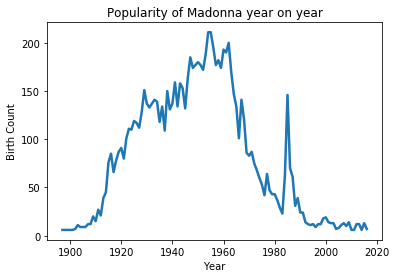

In [39]:
plt.plot(madonna, linewidth=2.5)
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.title('Popularity of Madonna year on year')
plt.show()

### 2. Total births over time
- create a plot that shows the total birth rate in the U.S. over time
- plot the total birth rate for girls/boys separately

In [40]:
year_sum = usa_names.groupby('year')['Birth Count'].sum()
year_sum = pd.DataFrame(year_sum)
year_sum.head()

,Birth Count
year,
1880,201484
1881,192696
1882,221533
1883,216946
1884,243462


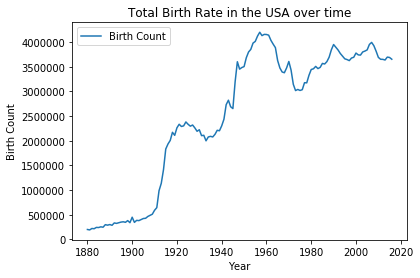

In [41]:
year_sum.plot()
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.title('Total Birth Rate in the USA over time')
plt.show()

In [42]:
usa_names.head()

,Names,Sex,Birth Count,year,Length of name
0,Mary,F,7065,1880,4
1,Anna,F,2604,1880,4
2,Emma,F,2003,1880,4
3,Elizabeth,F,1939,1880,9
4,Minnie,F,1746,1880,6


In [43]:
usa_females_males = usa_names.groupby(['year','Sex'])['Birth Count'].sum().unstack()
usa_females_males.head()

Sex,F,M
year,,
1880,90993,110491
1881,91953,100743
1882,107847,113686
1883,112319,104627
1884,129020,114442


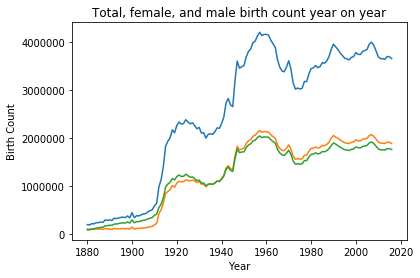

In [44]:
usa_names_males = usa_females_males.groupby('year')['M'].sum()
usa_names_females = usa_females_males.groupby('year')['F'].sum()

plt.plot(year_sum)
plt.plot(usa_names_males)
plt.plot(usa_names_females)
plt.xlabel('Year')
plt.ylabel('Birth Count')
plt.title('Total, female, and male birth count year on year')
plt.show()

### 3. Normalize
- divide the number of births by the total number of births in each year to obtain the relative frequency
- plot the time series of your name or the celebrity names again.

Hint: To reshape the data for plotting, you may find a combination of df.groupby( ) and df.unstack( ) useful.

In [45]:
year_sum = usa_names.groupby('year')[['Birth Count']].sum().reset_index()
year_sum.head()

,year,Birth Count
0,1880,201484
1,1881,192696
2,1882,221533
3,1883,216946
4,1884,243462


In [46]:
usa_names = usa_names.drop(columns='Length of name')
usa_names.head()

,Names,Sex,Birth Count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### Now let's merge! Almost always 'left' and you will merge 'on' a point they have in common, eg year!

Can change sufixes too!

In [47]:
merged_usa_names = usa_names.merge(year_sum, how='left', on='year',
                                   suffixes=('_name', '_total'))
merged_usa_names.head(10)

,Names,Sex,Birth Count_name,year,Birth Count_total
0,Mary,F,7065,1880,201484
1,Anna,F,2604,1880,201484
2,Emma,F,2003,1880,201484
3,Elizabeth,F,1939,1880,201484
4,Minnie,F,1746,1880,201484
5,Margaret,F,1578,1880,201484
6,Ida,F,1472,1880,201484
7,Alice,F,1414,1880,201484
8,Bertha,F,1320,1880,201484
9,Sarah,F,1288,1880,201484


In [48]:
merged_usa_names['Name Rel. %'] = merged_usa_names['Birth Count_name']/merged_usa_names['Birth Count_total']*100

In [49]:
merged_usa_names = merged_usa_names.sort_values(by='Name Rel. %', ascending=False)
merged_usa_names.head(10)

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %
942,John,M,9655,1880,201484,4.791944
943,William,M,9532,1880,201484,4.730897
2938,John,M,8769,1881,192696,4.550691
2939,William,M,8524,1881,192696,4.423548
4963,John,M,9557,1882,221533,4.314030
4964,William,M,9298,1882,221533,4.197117
7116,John,M,8894,1883,216946,4.099638
25438,Mary,F,11703,1891,286672,4.082366
20153,Mary,F,11648,1889,288946,4.031203
22743,Mary,F,12078,1890,301401,4.007286


In [50]:
my_name = merged_usa_names[(merged_usa_names['Names']=='Max') 
                    & (merged_usa_names['Sex'] == 'M')]
my_name.head()

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %
1711642,Max,M,3953,2011,3651914,0.108245
1677828,Max,M,3848,2010,3690700,0.104262
1643500,Max,M,3955,2009,3815638,0.103652
1745492,Max,M,3694,2012,3650462,0.101193
1778963,Max,M,3516,2013,3637310,0.096665


In [51]:
my_name = my_name.drop(columns=['Birth Count_name','Birth Count_total'])

In [52]:
my_names_stacked = my_name.set_index(['Names','Sex','year']).stack()
my_names_stacked.head()

Names  Sex  year             
Max    M    2011  Name Rel. %    0.108245
            2010  Name Rel. %    0.104262
            2009  Name Rel. %    0.103652
            2012  Name Rel. %    0.101193
            2013  Name Rel. %    0.096665
dtype: float64

In [53]:
my_name = my_names_stacked.unstack((0,1,3))
my_name.head()

Names,Max
Sex,M
,Name Rel. %
year,
1880,0.025809
1881,0.034251
1882,0.033404
1883,0.034571
1884,0.032859


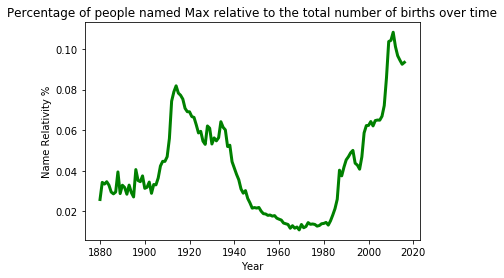

In [54]:
plt.plot(my_name, linewidth=3, color= 'green')
plt.xlabel('Year')
plt.ylabel('Name Relativity %')
plt.title('Percentage of people named Max relative to the total number of births over time')
plt.show()

## II. Letter Statistics

### 1. First letter statistics
- use df.apply(func) to add an extra column that contains the first letter of the name.
- count how many names start with ‘A’.
- plot the relative occurence of initials over time.
- what can you conclude from your observations?

Hint: You may need to iterate over the names with df.iterrows(). A more elegant solution is possible by writing a Python function and using df.apply()

In [55]:
merged_usa_names.head()

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %
942,John,M,9655,1880,201484,4.791944
943,William,M,9532,1880,201484,4.730897
2938,John,M,8769,1881,192696,4.550691
2939,William,M,8524,1881,192696,4.423548
4963,John,M,9557,1882,221533,4.314030


In [56]:
def initial(name):
    return name[0]

merged_usa_names['initial'] = merged_usa_names['Names'].apply(initial)

In [57]:
merged_usa_names.head()

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %,initial
942,John,M,9655,1880,201484,4.791944,J
943,William,M,9532,1880,201484,4.730897,W
2938,John,M,8769,1881,192696,4.550691,J
2939,William,M,8524,1881,192696,4.423548,W
4963,John,M,9557,1882,221533,4.314030,J


In [58]:
merged_usa_names[merged_usa_names['initial']== 'A']['initial'].count()

183449

In [59]:
first_letter_sum = merged_usa_names.groupby('year')['initial'].value_counts()

In [60]:
first_letter_sum.head()

year  initial
1880  A          190
      M          184
      L          176
      E          175
      C          151
Name: initial, dtype: int64

In [61]:
df = pd.DataFrame(first_letter_sum)
df.head()

initial
year initial         
1880 A            190
     M            184
     L            176
     E            175
     C            151

In [62]:
df = df.reset_index(0)

In [63]:
df.columns=['year','sum of initials']

In [64]:
df = df.reset_index()
df.head()

,initial,year,sum of initials
0,A,1880,190
1,M,1880,184
2,L,1880,176
3,E,1880,175
4,C,1880,151


In [65]:
merge = merged_usa_names.merge(df, how='left', on=['year', 'initial'])

In [66]:
merge.head()

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %,initial,sum of initials
0,John,M,9655,1880,201484,4.791944,J,100
1,William,M,9532,1880,201484,4.730897,W,68
2,John,M,8769,1881,192696,4.550691,J,101
3,William,M,8524,1881,192696,4.423548,W,69
4,John,M,9557,1882,221533,4.314030,J,110


In [67]:
merge['initial Rel. %'] = merge['sum of initials']/merge['Birth Count_total']*100

In [68]:
merge.head()

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %,initial,sum of initials,initial Rel. %
0,John,M,9655,1880,201484,4.791944,J,100,0.049632
1,William,M,9532,1880,201484,4.730897,W,68,0.033750
2,John,M,8769,1881,192696,4.550691,J,101,0.052414
3,William,M,8524,1881,192696,4.423548,W,69,0.035808
4,John,M,9557,1882,221533,4.314030,J,110,0.049654


In [69]:
merge = merge.sort_values(by='initial Rel. %', ascending=False)
merge.head()

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %,initial,sum of initials,initial Rel. %
598553,Amylah,F,30,2016,3652968,0.000821,A,4586,0.125542
32265,Alexandra,F,2844,2016,3652968,0.077855,A,4586,0.125542
1361230,Azizah,F,8,2016,3652968,0.000219,A,4586,0.125542
224532,Aarna,F,148,2016,3652968,0.004052,A,4586,0.125542
1361231,Azaleigh,F,8,2016,3652968,0.000219,A,4586,0.125542


In [70]:
initials = merge.drop(columns=['Birth Count_name', 'Birth Count_total', 'Name Rel. %', 'Sex', 'Names'])

In [71]:
initials.head()

,year,initial,sum of initials,initial Rel. %
598553,2016,A,4586,0.125542
32265,2016,A,4586,0.125542
1361230,2016,A,4586,0.125542
224532,2016,A,4586,0.125542
1361231,2016,A,4586,0.125542


In [72]:
initials = initials.drop_duplicates()

In [73]:
#initials_s = initials.set_index(['sum of initials', 'initial', 'year']).stack()

In [74]:
#initials_s.unstack((0,1, 3))

In [75]:
#plt.plot(initials_s, linewidth=3)


### 2. Last letter statistics
- try the same for the final character
- separate by boys/girls
- what can you conclude from your observations?

In [76]:
def last_letter(name):
    return name[-1]

merged_usa_names['last letter'] = merged_usa_names['Names'].apply(last_letter)

merged_usa_names.head(5)

,Names,Sex,Birth Count_name,year,Birth Count_total,Name Rel. %,initial,last letter
942,John,M,9655,1880,201484,4.791944,J,n
943,William,M,9532,1880,201484,4.730897,W,m
2938,John,M,8769,1881,192696,4.550691,J,n
2939,William,M,8524,1881,192696,4.423548,W,m
4963,John,M,9557,1882,221533,4.314030,J,n


### 3. e-rich Names
- Find all names that contain the character ‘e’ at least four times.

In [77]:
usa_names.head()

,Names,Sex,Birth Count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### USE .APPLY to apply a function!


In [84]:
def four_e(input):
    check = []
    for i in input:
        if i == 'e' or i == 'E':
            check.append(i)
    return len(check)

usa_names['e occurences'] = usa_names['Names'].apply(four_e)
    
usa_names.head()

,Names,Sex,Birth Count,year,e occurences
0,Mary,F,7065,1880,0
1,Anna,F,2604,1880,0
2,Emma,F,2003,1880,1
3,Elizabeth,F,1939,1880,2
4,Minnie,F,1746,1880,1


In [85]:
many_es = usa_names[usa_names['e occurences'] > 3]
many_es.head()

,Names,Sex,Birth Count,year,e occurences
201,Genevieve,F,59,1880,4
931,Tennessee,F,5,1880,4
1899,Everette,M,5,1880,4
196,Genevieve,F,58,1881,4
186,Genevieve,F,74,1882,4


In [86]:
len(many_es)

2092